# **Frontier Technologies Learning Collaborative​**
## **Week 3: Classification**

### **Question: What kind of data more suitable for a classification task?**

~~**A)** Quantative Data~~

~~**B)** Continuous Data~~

**C)** Categorical Data

### **Question: Which of the visual represent the Sigmoid Function? (A, B, C)**

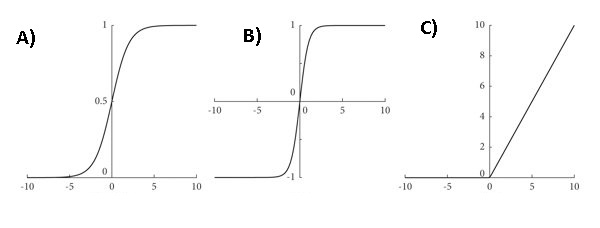

Answer: A)

### **Question: Please write sigmoid function that receives a value and returns the output after sigmoid function calculation**

**The sigmoid function:**

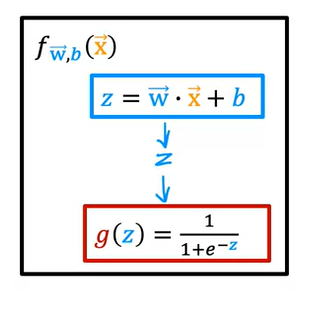

In [1]:
import math

def sigmoid(z):

  # formula
  return 1 / (1 + math.exp(-z))

### **Question: Please visualize given sample dataset**

Expected output(please do not consider the colors or the theme of the sample visuals, main purpose is to visualize data points):



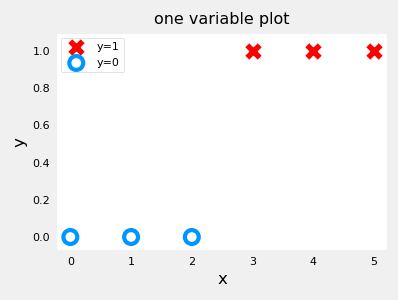

In [2]:
import numpy as np
!pip install ipympl
!pip install ipywidgets


from google.colab import output
output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

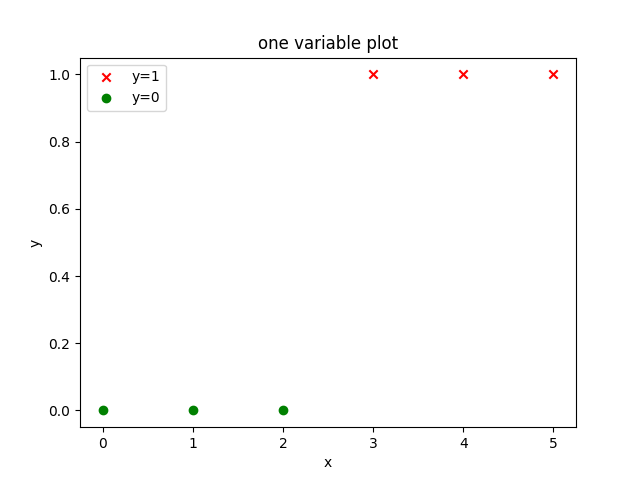

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt

pos = y_train == 1
neg = y_train == 0


fig,ax = plt.subplots(1)


plt.scatter(x_train[pos], y_train[pos], marker='x', c='red', label='y=1')
plt.scatter(x_train[neg], y_train[neg], marker='o', c='green', label='y=0')

plt.title('one variable plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


## **Classification Task: Finding smokers by body signals**

### **The dataset**

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

**Data shape: (55692, 27)**

*   **ID:** index
*   **gender**
*   **age:** 5-years gap
*   **height(cm)**
*   **weight(kg)**
*   **waist(cm):** Waist circumference length
*   **eyesight(left)**
*   **eyesight(right)**
*   **hearing(left)**
*   **hearing(right)**
*   **systolic:** Blood pressure
*   **relaxation:** Blood pressure
*   **fasting blood sugar**
*   **Cholesterol: **total
*   **triglyceride**
*   **HDL:** cholesterol type
*   **LDL:** cholesterol type
*   **hemoglobin**
*   **Urine protein**
*   **serum creatinine**
*   **AST:** glutamic oxaloacetic transaminase type
*   **ALT:** glutamic oxaloacetic transaminase type
*   **Gtp:** γ-GTP
*   **oral:** Oral Examination status
*   **dental caries**
*   **tartar:** tartar status
*   **smoking**

### **1. Import required packages**

In [5]:
import pandas as pd

### **2. Import dataset**

In [6]:
smoking_df = pd.read_csv('smoking.csv')

### **3. Explore dataset**

*   Info
*   Shape
*   Do  visualization on features, (i.e. gender distribution on a pie chart, or histograms on other kind of features)
*   Identify valuable features for ML training (observe correlations between smokers and not smokers based on the features)
*   Preapre the dataset for ML model (converting categorical values to numerical variables - labelencoding)

In [7]:
smoking_df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
smoking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

20291 859
35401 19596


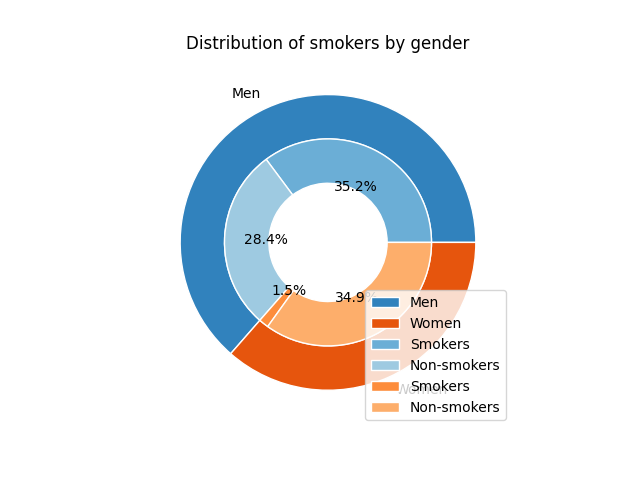

In [9]:
women = smoking_df[smoking_df['gender'] == 'F']
men = smoking_df[smoking_df['gender'] == 'M']

men_sm = men[men['smoking'] == 1]
women_sm = women[women['smoking'] == 1]

women_c = women.shape[0]
men_c = men.shape[0]

print(women_c, women_sm.shape[0])
print(men_c, men_sm.shape[0])

women_s_c = women_sm.shape[0]
men_s_c = men_sm.shape[0]

labels = ['Men', 'Women']
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 2, 5, 6])

fig, ax = plt.subplots()


ax.pie([men_c, women_c], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels)

ax.pie([men_s_c, men_c - men_s_c, women_s_c, women_c - women_s_c], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%1.1f%%')

ax.set(aspect="equal", title='Distribution of smokers by gender')
plt.legend(['Men', 'Women','Smokers','Non-smokers','Smokers', 'Non-smokers'])
plt.show()

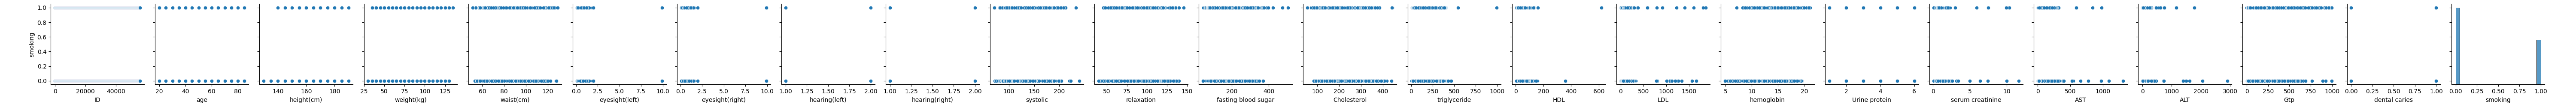

In [10]:
import seaborn as sns 

pp = sns.pairplot(data=smoking_df,
                  y_vars=['smoking'])

### **4. Build & Train Logistic Regression model (sklearn)**


*   Split the dataset into test and training sets (X_train, X_test, y_train, y_test)
*   Initiate the logistic regression model
*   Start training (you may also adjust parameters)




In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# please do add other packages in need

In [12]:
standard_scaler = StandardScaler()

x = smoking_df.drop(columns=['smoking', 'ID', 'age', 'weight(kg)', 'height(cm)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'])
y = smoking_df['smoking']

# transforming non-numerical columns
x['tartar'] = x['tartar'].map({'Y':1, 'N': 0})
x['oral'] = x['oral'].map({'Y':1, 'N': 0})
x['gender'] = x['gender'].map({'F':1, 'M': 0})


x = pd.DataFrame(standard_scaler.fit_transform(x),columns = x.columns)

x.describe()

,gender,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
count,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,55692.0,5.569200e+04,5.569200e+04
mean,-6.844900e-17,3.957666e-16,9.517792e-17,-2.012005e-16,1.363877e-16,-4.172008e-17,1.926524e-16,6.315425e-17,8.576858e-16,2.324587e-16,2.380724e-16,2.653754e-17,-1.633080e-17,2.832372e-17,0.0,3.648912e-17,-9.823995e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.0,1.000009e+00,1.000009e+00
min,-7.570838e-01,-3.692213e+00,-3.719818e+00,-2.563659e+00,-3.909387e+00,-1.656436e+00,-3.615643e+00,-2.784641e+00,-6.214566e+00,-2.154023e-01,-3.546993e+00,-1.042761e+00,-8.412949e-01,-7.745503e-01,0.0,-5.207568e-01,-1.118034e+00
25%,-7.570838e-01,-6.942316e-01,-6.203855e-01,-4.958944e-01,-6.860347e-01,-7.351522e-01,-6.981793e-01,-5.611210e-01,-6.536288e-01,-2.154023e-01,-3.870386e-01,-3.711097e-01,-3.889170e-01,-4.563961e-01,0.0,-5.207568e-01,-1.118034e+00
50%,-7.570838e-01,-1.092595e-01,-4.990228e-04,-1.592816e-01,-5.238422e-02,-2.605515e-01,-1.553954e-01,-4.800117e-02,1.133970e-01,-2.154023e-01,6.438350e-02,-1.644478e-01,-1.950407e-01,-2.973191e-01,0.0,-5.207568e-01,8.944272e-01
75%,1.320858e+00,6.219556e-01,6.193875e-01,2.254188e-01,6.363663e-01,4.653083e-01,5.909324e-01,5.139873e-01,7.525853e-01,-2.154023e-01,5.158056e-01,9.387954e-02,1.280864e-01,6.060436e-02,0.0,-5.207568e-01,8.944272e-01
max,1.320858e+00,8.665322e+00,7.231510e+00,1.950853e+01,6.835121e+00,1.217678e+01,3.804302e+01,4.263869e+01,4.140283e+00,1.213397e+01,4.836655e+01,6.638068e+01,9.328563e+01,1.907031e+01,0.0,1.920282e+00,8.944272e-01


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

regr = LogisticRegression()

regr = regr.fit(x, y)

y_pred = regr.predict(x_test)

score = regr.score(x_test, y_test)

# The coefficients
print('Model Coefficients (w\'s): \n', regr.coef_)
print('Testing Accuracy : ', score)

Model Coefficients (w's): 
 [[-1.49364701 -0.22158908  0.09236675  0.05968899 -0.09769465  0.33160232
   0.06032479 -0.00647855  0.2215548   0.0034524  -0.19717958 -0.01921775
  -0.19674486  0.35734975  0.          0.1312204   0.16847792]]
Testing Accuracy :  0.7513241763174432


### **5. Evaluate the LR model with the test dataset**

- Classification report

Text(0.5, 427.9555555555555, 'Predicted label')

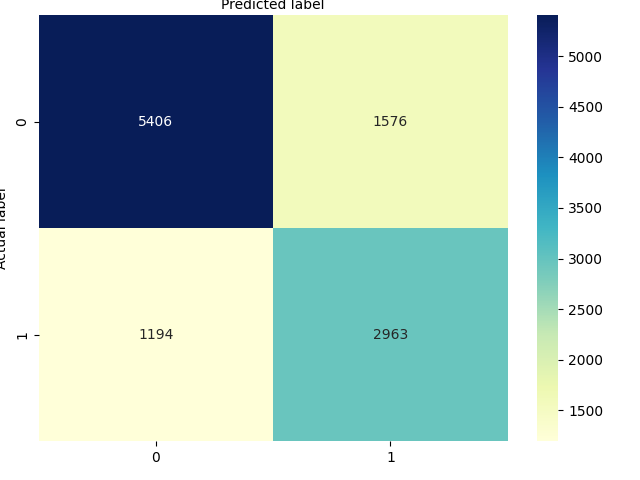

In [43]:
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




### **6. Visualize the classification results**

In [26]:
target_names = ['smoking', 'non-smoking']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     smoking       0.81      0.77      0.79      3471
 non-smoking       0.65      0.71      0.68      2099

    accuracy                           0.75      5570
   macro avg       0.73      0.74      0.74      5570
weighted avg       0.75      0.75      0.75      5570

